In [1]:
import jax
import jax.numpy as np
import jax.scipy.stats as stats
import matplotlib.pyplot as plt
import numpy,pickle
from jax.tree_util import tree_map, tree_flatten

from jax import jit,vmap
import pandas as pd
import blackjax

import sys,os,importlib,pdb
sys.path.append('/mnt/home/szheng/projects/util_code')
import gm

import scipy
from scipy.signal import find_peaks
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
from importlib import reload

import copy

%matplotlib inline
import gm_glm_bayesian as glm
import gm_glm_bayesian_helper as glmh
import math_functions as mf

In [2]:
sess_name="e15_13f1_220117"
py_data_dir = "/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data"
fr_ = pickle.load(open(os.path.join(py_data_dir,'fr.p'),'rb'))
pos_bins = fr_['pos_bins']['lin']
bin_to_lin=numpy.concatenate([pos_bins[:-1,None],pos_bins[1:,None]],axis=1).mean(axis=1)

fr = fr_['df']['pyr']
fr_map_ = pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))['fr_map_trial']

In [3]:
unit_int = 31
unit_str = f'unit_{unit_int}'

unit_ind_in_pyr = 0

trial_ind_dict = dict(fr.groupby('visitedArm')['trial'].unique())
fr_map_one_unit_both_trials_dict = {k:val[unit_ind_in_pyr] for k,val in fr_map_.items()}
pars=gm.init_both_trial_types(fr_map_one_unit_both_trials_dict,trial_ind_dict,bin_to_lin=None)

pars_rand=gm.init_both_trial_types(fr_map_one_unit_both_trials_dict,trial_ind_dict,bin_to_lin=None,random_init=True)


regressors=glm.get_regressors(fr)
target = fr[unit_str].values
pars=gm.init_both_trial_types(fr_map_one_unit_both_trials_dict,trial_ind_dict,bin_to_lin=None,random_init=True)


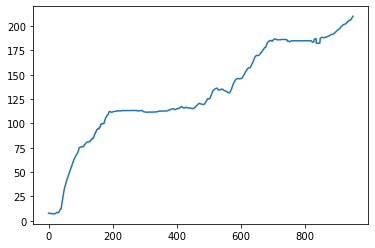

In [4]:
inds = slice(250,1200)
regressors_sim = {'trial_inds_int':regressors['trial_inds_int'][inds],'position':regressors['position'][inds],'dt':regressors['dt']}
plt.plot(regressors_sim['position'])
trial_len = len(regressors_sim['position'])

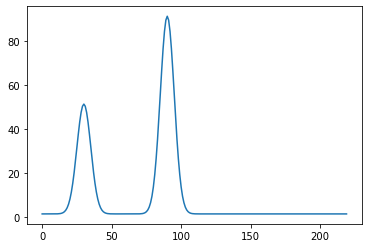

In [5]:
reload(glmh)
# generate multiple trials using the same param
ntrials = 20#60#20
# pars_sim = gm.init_all_trials(ntrials=1,random_init=True,sigma_default=10)
# pars_sim = {'logws':np.array([[50.,90.]]),'mus':np.array([[70,90]]),'logb':np.array([1.]),'logsigmas':np.array([[20.,10.]])}
pars_sim = {'logws':np.array([[50.,90.]]),'mus':np.array([[30,90]]),'logb':np.array([1.]),'logsigmas':np.array([[5.,5.]])}
# pars_sim = duplicate_dict(pars_sim,(ntrials,1))
regressors_sim_dup=glmh.duplicate_dict(regressors_sim,N=ntrials,trial_len=trial_len)

target_rate = glm.forward(regressors_sim_dup,pars_sim)
target_spk = numpy.random.poisson(target_rate)

ys_l=gm.gm_func_by_trial(gm.get_regressor({'xs':np.arange(220)}),pars_sim)

plt.plot(np.squeeze(ys_l))


In [244]:
ch=2
print(samples['mus'][-1,ch])
print(samples['logsigmas'][-1,ch])
print(samples['logws'][-1,ch])

[[ 96.561485 135.85947 ]
 [ 96.86482  136.25287 ]
 [ 97.69204  136.52382 ]
 [ 99.927475 137.44374 ]
 [102.270386 138.52985 ]
 [105.59047  139.2397  ]
 [109.53161  140.12462 ]
 [113.33507  141.06396 ]
 [115.21873  141.86996 ]
 [117.133644 142.65648 ]
 [118.01934  143.03745 ]
 [117.885284 143.30402 ]
 [116.60486  143.41412 ]
 [114.65747  142.92383 ]
 [111.50867  142.53035 ]
 [107.99156  141.46808 ]
 [103.36375  139.85104 ]
 [ 99.746475 138.90195 ]
 [ 97.66089  137.91968 ]
 [ 96.89936  137.15536 ]]
[[ 6.226473   6.4009447]
 [ 6.235661   5.4000506]
 [ 6.885708   4.338421 ]
 [ 8.2744875  3.4855795]
 [ 9.69998    3.0533817]
 [11.913938   3.085645 ]
 [14.032044   2.954763 ]
 [16.045015   3.014297 ]
 [17.425089   2.9999774]
 [18.2181     3.0279536]
 [18.344452   3.0867257]
 [18.177309   3.0078173]
 [17.544338   2.965795 ]
 [16.344774   3.902246 ]
 [14.905785   4.5800953]
 [12.755905   5.5211563]
 [ 9.716776   6.922876 ]
 [ 7.384996   8.100649 ]
 [ 5.936032   8.362832 ]
 [ 6.248322   8.653748 ]

In [232]:
states.logprob_grad['mus'][-1,0]

DeviceArray([[-7.3114395 ,  3.703897  ],
             [ 5.2334723 ,  1.7670661 ],
             [-7.8932424 , -6.182404  ],
             [12.03626   ,  2.8917015 ],
             [-7.003359  ,  5.2446604 ],
             [-5.076325  , -6.871215  ],
             [ 1.6878017 , -0.316075  ],
             [-7.869586  , -0.8385816 ],
             [ 9.594276  , -1.560482  ],
             [ 5.6200857 ,  8.423933  ],
             [-6.82071   , -8.519316  ],
             [ 5.5592594 ,  0.9268864 ],
             [-2.1081817 ,  8.798679  ],
             [ 4.5920105 , -7.444034  ],
             [-1.1353787 , -3.2768495 ],
             [-3.2300498 , -1.9114685 ],
             [-0.16090553,  4.4371595 ],
             [ 7.8313217 ,  4.8963623 ],
             [-9.883972  , -1.7065116 ],
             [ 5.5510297 ,  1.4663353 ]], dtype=float32)

In [239]:
reload(glm)

<module 'gm_glm_bayesian' from '/mnt/home/szheng/projects/util_code/gm_glm_bayesian.py'>

In [429]:
%%time
K = 2
Nchains = 32
Nsamples = 5000
regressors_ = regressors_sim_dup
reg_pars = gm.get_reg_pars({'g_mu':0.1,'g_sigma':0.1,'g_w':10.,'g_b':10.,'g_sigma_thresh':100000.,'sigma_thresh':3})

key = jax.random.PRNGKey(1)
key_l = jax.random.split(key,num=Nchains)
pars_sim_init_multi=jax.vmap(glm.random_init_jax,in_axes=(0,None,None))(key_l,ntrials,K)
pars_sim_init_one = glm.random_init_jax(key,ntrials,K)
nparams = len(jax.flatten_util.ravel_pytree(pars_sim_init_one)[0])
inv_mass_matrix = np.ones(nparams)

step_size = 1e-2
# sampler_func = blackjax.nuts
# sampler_kw = {'step_size':step_size,'inv_mass_matrix':inv_mass_matrix}
# sampler_func = blackjax.hmc
# sampler_kw = {'step_size':step_size,'inv_mass_matrix':inv_mass_matrix,'num_integration_steps':60}
sampler_func = blackjax.mala
sampler_kw = {'step_size':step_size}


states,infos = glm.fit_multichain(regressors_,pars_sim_init_multi,target_spk, reg_pars=reg_pars,reg_type='gaussian_logprior_laplacian' ,sampler_func=sampler_func,sampler_kw=sampler_kw,num_samples=Nsamples,rng_key_int=0)
samples = states.position
try:
    logprob=states.logprob
    logprob_grad =states.logprob_grad 
except:
    logprob=-states.potential_energy
    logprob_grad =states.potential_energy_grad

CPU times: user 6.08 s, sys: 928 ms, total: 7 s
Wall time: 7.01 s


In [116]:
# res = {'samples':samples,'target_rate':'target_rate','target_spk':target_spk,'reg_pars':reg_pars,'regressors':regressors_,'pars_sim':pars_sim}
# import pickle
# nuts_fit = pickle.dump(res,open('nuts_fit_moretrials.p','wb'))


In [430]:
np.set_printoptions(precision=3,suppress=True)
infos.is_accepted.mean(axis=0)

DeviceArray([0.625, 0.635, 0.019, 0.633, 0.626, 0.618, 0.634, 0.638,
             0.627, 0.627, 0.011, 0.62 , 0.014, 0.631, 0.618, 0.011,
             0.643, 0.633, 0.037, 0.634, 0.626, 0.015, 0.022, 0.033,
             0.619, 0.018, 0.009, 0.628, 0.029, 0.634, 0.019, 0.64 ],            dtype=float32)

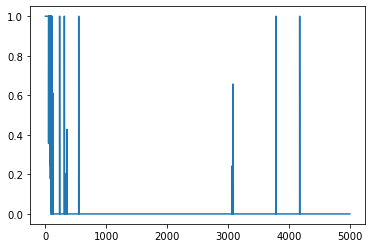

In [431]:
plt.plot(infos.acceptance_probability[:,2])

(-7000.0, -5000.0)

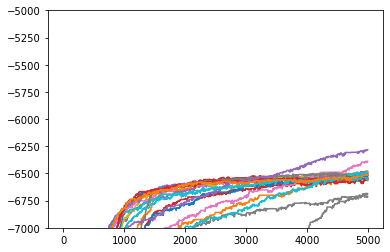

In [428]:
plt.plot(logprob)
plt.ylim([-7000,-5000])

In [388]:
scipy.stats.zscore(numpy.array(ending_logprob))

array([ 0.623,  0.623, -1.13 ,  0.622,  0.622,  0.624,  0.621,  0.734,
        0.622,  0.622, -2.467,  0.735, -1.63 ,  0.623,  0.624, -1.981,
        0.732,  0.622, -0.268,  0.734,  0.62 , -1.251, -0.441,  0.625,
        0.735, -0.803, -2.436,  0.623, -0.625,  0.623, -0.6  ,  0.622],
      dtype=float32)

In [389]:
ending_logprob = logprob[-50:,:].mean(axis=0)

z_thresh = 0
valid_chains_mask = scipy.stats.zscore(numpy.array(ending_logprob)) > z_thresh


burn_in = Nsamples // 2
thinning = 100#1 #10
mask = valid_chains_mask
samples_filtered = tree_map(lambda x:x[burn_in:Nsamples:thinning,mask],samples)
logprob_filtered = tree_map(lambda x:x[burn_in:Nsamples:thinning,mask],logprob)
logprob_grad_filtered = tree_map(lambda x:x[burn_in:Nsamples:thinning,mask],logprob_grad)
samples_filtered_thinned_noburn = tree_map(lambda x:x[0:Nsamples:thinning,mask],samples)
samples_filtered_sorted=glmh.sort_pars_fit_multichain(samples_filtered)

paccept_filtered = tree_map(lambda x:x[burn_in:Nsamples:thinning,mask],infos.acceptance_probability)
isaccpt_filtered = tree_map(lambda x:x[burn_in:Nsamples:thinning,mask],infos.is_accepted)

In [390]:
isaccpt_filtered.mean(axis=0)

DeviceArray([0.664, 0.608, 0.608, 0.584, 0.58 , 0.596, 0.584, 0.656,
             0.62 , 0.572, 0.62 , 0.668, 0.572, 0.608, 0.616, 0.632,
             0.636, 0.588, 0.604, 0.652, 0.636], dtype=float32)

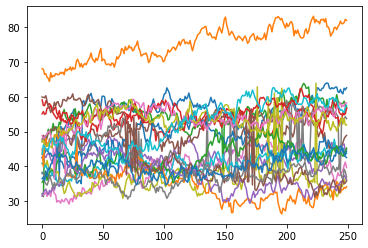

In [391]:
plt.plot(samples_filtered_sorted['logws'][:,:,0,0])

In [9]:
def plot_one_trial_one_par(key,samples_filtered_sorted,trial,fig=None,ax=None):
    data = mf.softplus(samples_filtered_sorted[key][:,:,tt])
    if 'log' in key:
        data = mf.softplus(data)
    if ax is None:
        fig,ax=plt.subplots()
    if 'b' not in key:
        for kk in range(data.shape[-1]):
            ax.hist(numpy.array(data[...,kk].flatten()),alpha=0.5,color=f'C{kk}')
            ax.axvline(data[...,kk].mean(),linestyle=':',color=f'C{kk}')
    return fig,ax
                       

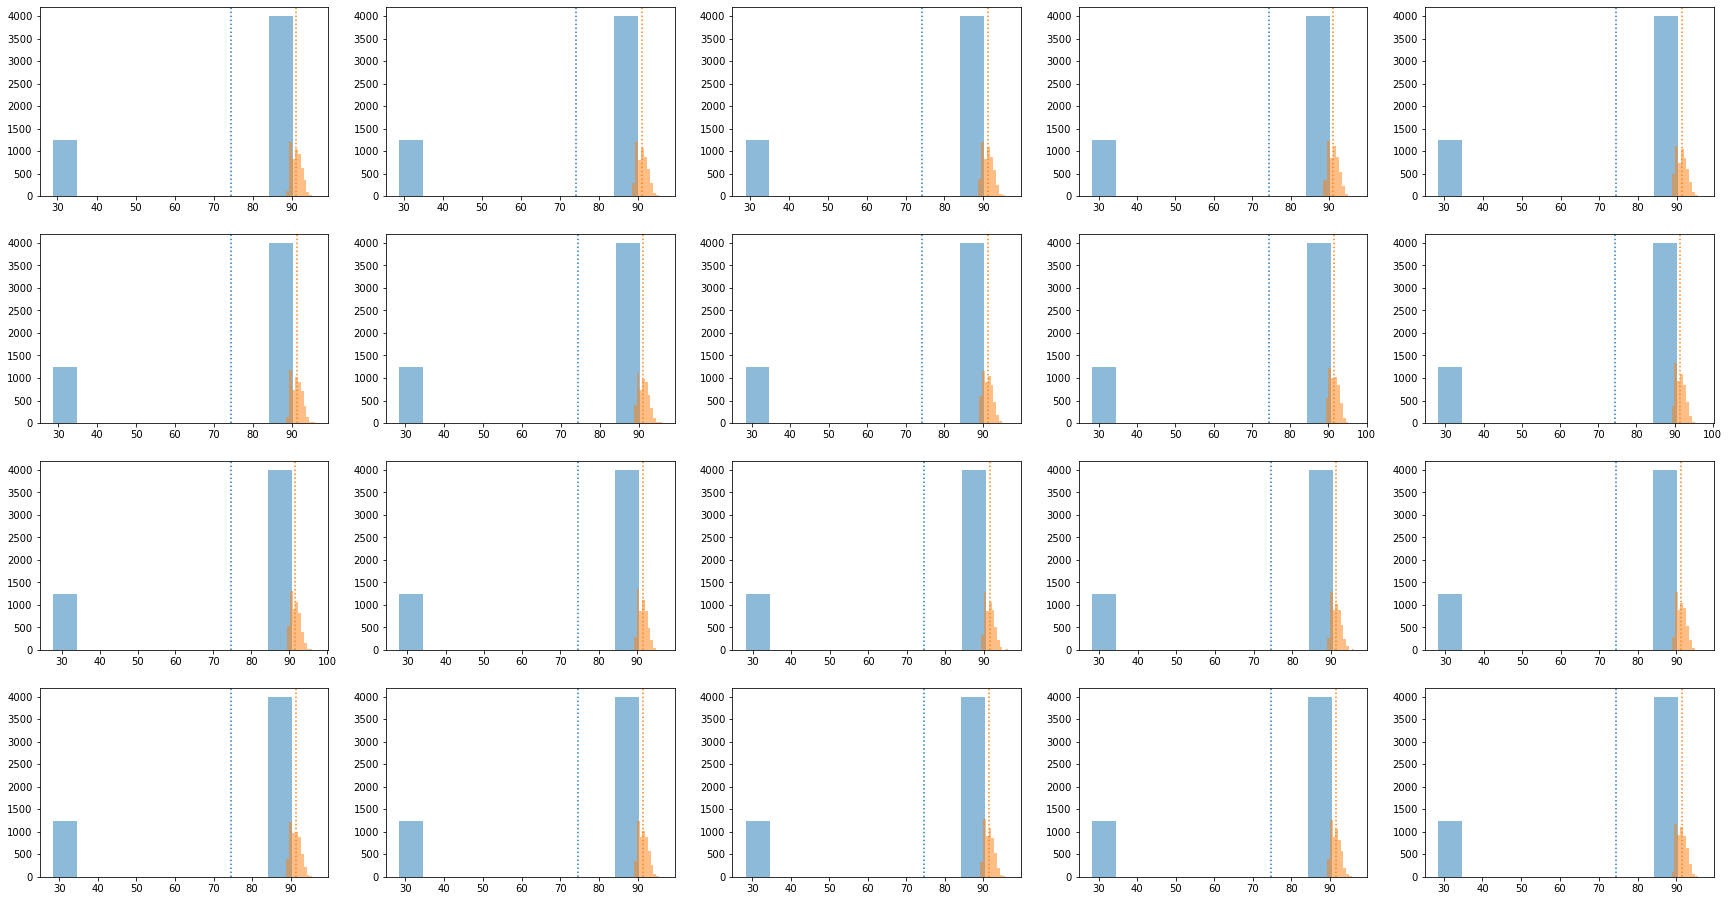

In [392]:
ntrials_to_plot = ntrials#6 #
fig,axs=ph.subplots_wrapper(ntrials_to_plot,return_axs=True)
# chain_inds=[0];toplot = tree_map(lambda x:x[:,chain_inds],samples_filtered_sorted)
toplot = samples_filtered_sorted

for tt in range(ntrials_to_plot):
    fig,ax=plot_one_trial_one_par('mus',toplot,tt,fig=fig,ax=axs.ravel()[tt])

In [190]:
def get_prediction_one(par_one_sample,nbins=220):
    ys_l_hat=gm.gm_func_by_trial(gm.get_regressor({'xs':np.arange(nbins)}),par_one_sample)
    return ys_l_hat

def get_pred_distribution_multichain(par_multichain,nbins=220):
    '''
    for firing map
    '''
    func = lambda x: get_prediction_one(x,nbins=nbins)
    sample_func = vmap(func,in_axes=(0,))
    yhat_distribution=vmap(sample_func,in_axes=(0,))(par_multichain)
    return yhat_distribution

def get_pred_distribution_multichain_intime(regressors, par_multichain):
    '''
    for rate in time
    '''
    func = lambda par:glm.forward(regressors,par)
    sample_func = vmap(func,in_axes=(0,))
    yhat_distribution = vmap(sample_func,in_axes=(0,))(par_multichain)
    return yhat_distribution
    


def get_logpdf_multichain(regressors,par_multichain,target,mask=None,noise_type="poisson"):
    func = vmap(lambda par:glm.logpdf_no_reg(regressors,par,target,mask=mask,noise_type=noise_type),in_axes=(0,))
    logpdf_dist = vmap(func,in_axes=(0,))(par_multichain)
    return logpdf_dist
    

def get_pred_mean_and_ci(yhat_dist,mean_axis=[0,1],ci_sc=1.96):
    yhat_mean = yhat_dist.mean(axis=mean_axis)
    nsamples = np.prod(numpy.array(yhat_dist.shape)[mean_axis])
    yhat_ci = ci_sc * yhat_dist.std(axis=mean_axis) / np.sqrt(nsamples)

    return yhat_mean, yhat_mean+yhat_ci, yhat_mean-yhat_ci




In [188]:
def plot_ypred_target_one(yhat_mean_one, yhat_upper_one, yhat_lower_one,ys_l_one,fig=None,ax=None):
    if ax is None:
        fig,ax=plt.subplots()
    ax.plot(ys_l_one,color='k',label='target')
    ax.plot(yhat_mean_one,'k:',label='pred mean')
    ax.fill_between(np.arange(len(yhat_upper_one)),yhat_upper_one,yhat_lower_one,alpha=0.5,label='ci')
    plt.legend()
    return fig,ax
    

In [393]:
yhat_dist_all = get_pred_distribution_multichain(samples_filtered_thinned_noburn)


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

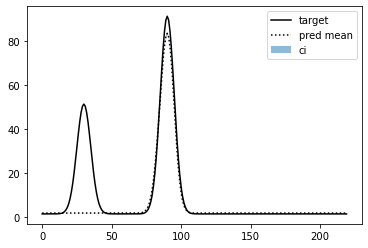

In [419]:
yhat_dist = get_pred_distribution_multichain(samples_filtered_sorted)
tt=3
chain = 20
yhat_mean, yhat_upper, yhat_lower=get_pred_mean_and_ci(yhat_dist,mean_axis=[0],ci_sc=1.96)
yhat_mean_one = yhat_mean[chain,:,tt]
yhat_upper_one = yhat_upper[chain,:,tt]
yhat_lower_one = yhat_lower[chain,:,tt]
# yhat_dist = get_pred_distribution_multichain(samples_filtered_sorted)
# yhat_mean, yhat_upper, yhat_lower=get_pred_mean_and_ci(yhat_dist,mean_axis=[0,1],ci_sc=1.96)
# yhat_mean_one = yhat_mean[:,tt]
# yhat_upper_one = yhat_upper[:,tt]
# yhat_lower_one = yhat_lower[:,tt]

ys_l_one = ys_l[:,tt]
plot_ypred_target_one(yhat_mean_one, yhat_upper_one, yhat_lower_one,ys_l_one,fig=None,ax=None)

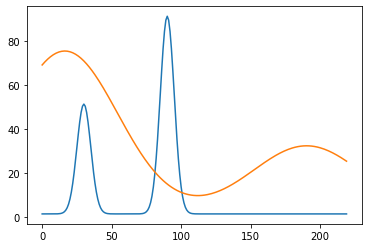

In [205]:
tt=2
plt.plot(ys_l_one)
plt.plot(yhat_dist_all[1300,chain,:,tt])

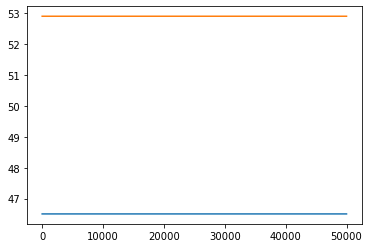

In [204]:
chain = 6
plt.plot(samples['mus'][:,valid_chains_mask,0,:][:,chain])

In [ ]:
# diagnostic for one chain

# average across sample, firing map match, one trial

# evolution of one par, across samples, one trial

# 

In [156]:
# loss landscape
def loss_landscape_1d(par,key,ind,val_l,par_arg_index=1,loss_func=glm.negative_logpdf_no_reg,loss_args=[],loss_kwargs={'reg_pars':reg_pars,'reg_type':'gaussian_logprior_laplacian'}):
    par_copy = copy.copy(par)
    loss_l = []
    for val in val_l:
        par_copy[key]=par_copy[key].at[ind].set(val)
#         l = glm.negative_logpdf_no_reg(regressors,par_copy,target)
#         l = glm.negative_logpdf(regressors,par_copy,target,reg_pars=reg_pars,reg_type='gaussian_logprior_laplacian')
        loss_args[par_arg_index] = par_copy
        l = loss_func(*loss_args,**loss_kwargs)
        loss_l.append(l)
    return numpy.array(loss_l)

In [153]:
neg_prior_l

array([131761.48, 131761.48, 131761.48, 131761.48, 131761.48, 131761.48,
       131761.48, 131761.48, 131761.48, 131761.48, 131761.48, 131761.48,
       131761.48, 131761.48, 131761.48, 131761.48, 131761.48, 131761.48,
       131761.48, 131761.48, 131761.48, 131761.48], dtype=float32)

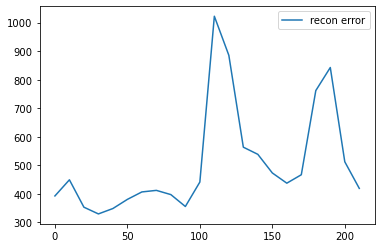

In [233]:
ss=-1
chain=6
par_one = glmh.index_into_pytree(samples_filtered_thinned_noburn,(ss,chain))
val_l = numpy.arange(0,220,10).astype(float)
# loss_l=loss_landscape_1d(regressors_,par_one,target_spk,'mus',(tt,0),val_l)

# loss_args=[regressors_,par_one,target_spk]
loss_args=[regressors_sim,pars_sim,target_spk[trial_len:2*trial_len]]
loss_kwargs={'reg_pars':reg_pars,'reg_type':'gaussian_logprior_laplacian'}
# loss_l=loss_landscape_1d(par_one,'mus',(tt,0),val_l,par_arg_index=1,loss_func=glm.negative_logpdf_no_reg,loss_args=loss_args,loss_kwargs=loss_kwargs)

pars_sim_=copy.copy(pars_sim)
pars_sim_['mus'] = pars_sim['mus'].at[(0,1)].set(110.)
pars_sim_['mus'] = pars_sim['mus'].at[(0,0)].set(90.)
loss_l=loss_landscape_1d(pars_sim_,'mus',(0,1),val_l,par_arg_index=1,loss_func=glm.negative_logpdf_no_reg,loss_args=loss_args,loss_kwargs=loss_kwargs)

# reg_pars_test=gm.get_reg_pars({'g_mu':100.,'g_sigma':1.,'g_w':100.,'g_b':100.,'g_sigma_thresh':100000.,'sigma_thresh':3})
reg_pars_test=reg_pars
loss_args=[par_one,reg_pars_test]
loss_kwargs={'reg_type':'gaussian_logprior_laplacian'}
neg_prior_l = -loss_landscape_1d(par_one,'mus',(tt,0),val_l,par_arg_index=0,loss_func=glm.logprior,loss_args=loss_args,loss_kwargs=loss_kwargs)

plt.plot(val_l,loss_l,label='recon error')
# plt.plot(val_l,neg_prior_l,label='regularization')
plt.legend()


In [137]:
logprob_filtered[ss,chain]

DeviceArray(-156199.61, dtype=float32)

In [65]:

print(logprob_grad_filtered['mus'][-2,chain])
print(samples_filtered_sorted['mus'][-2,chain])
print(samples_filtered_sorted['mus'][-1,chain])

[[ -4.757609    -6.4150457 ]
 [  2.0322604    0.11036045]
 [ -1.6728294   14.803413  ]
 [  4.0578465  -14.325705  ]
 [ -5.0143967   15.754207  ]
 [  8.865117     1.6255498 ]
 [ -3.1718109   -5.645764  ]
 [  0.48534247   1.5079129 ]
 [  1.6110936    9.577866  ]
 [  0.21665217  -4.52009   ]
 [  2.6431172   -0.47732365]
 [ -1.2080991   -0.77933   ]
 [ -0.75009084  -1.1779742 ]
 [  2.0181708    1.9100058 ]
 [ -2.1499732   -4.19327   ]
 [ -0.10455944   0.28265992]
 [  2.7190099    3.9655414 ]
 [ -1.9076269    0.33772057]
 [ -7.1351705   -2.9925966 ]
 [  1.4034706   -4.2428517 ]]
[[89.814835 90.07827 ]
 [90.20198  90.49453 ]
 [90.39782  90.98211 ]
 [90.08578  90.78949 ]
 [90.811264 90.85052 ]
 [90.42094  91.41531 ]
 [90.081665 91.22245 ]
 [90.26998  91.34306 ]
 [90.10575  91.3437  ]
 [89.33589  91.24557 ]
 [89.267334 91.17207 ]
 [89.24442  90.84061 ]
 [89.35325  90.65681 ]
 [89.52368  90.48966 ]
 [89.44585  90.12824 ]
 [89.683815 89.93314 ]
 [89.77993  89.95106 ]
 [89.37479  89.855606]
 [89.

In [42]:
# par_one = glmh.index_into_pytree(samples_filtered_sorted,(-2,chain))
par_one = glmh.index_into_pytree(samples_filtered_thinned_noburn,(0,chain))

In [43]:
par_one

{'b_bar': DeviceArray(2.2348554, dtype=float32),
 'logb': DeviceArray([ 1.3436539 , -0.81764853,  3.3910904 ,  1.0552205 ,
              -3.3812032 ,  0.30727845,  0.3969736 ,  3.1096842 ,
               4.0191116 ,  2.0176544 ,  4.081127  ,  1.117908  ,
               3.534188  ,  3.6923203 ,  2.3013642 ,  0.51578546,
              -5.059955  ,  3.6695971 ,  3.9712458 ,  3.257098  ],            dtype=float32),
 'logsigmas': DeviceArray([[17.55294  , 10.683758 ],
              [ 1.1206619, 14.301134 ],
              [-1.0082673, 20.47301  ],
              [38.320507 ,  7.773033 ],
              [36.085293 , 45.195248 ],
              [16.335491 , 15.302189 ],
              [13.653197 , 13.487296 ],
              [30.404337 , 41.15937  ],
              [35.654324 , 48.40237  ],
              [40.30168  , 40.6133   ],
              [41.619427 , 19.369894 ],
              [46.332912 , 14.934886 ],
              [38.810482 ,  4.2023196],
              [19.234348 , 13.191426 ],
            

In [70]:
# jax.grad(glm.negative_logpdf_no_reg,1)(regressors_,par_one,target_spk)
jax.grad(glm.negative_logpdf,1)(regressors_,par_one,target_spk,reg_pars=reg_pars,reg_type='gaussian_prior_laplacian')

{'logb': DeviceArray([-3.1502502 ,  2.7835913 ,  0.827808  ,  4.724631  ,
              -4.853724  ,  4.7186155 ,  4.699547  ,  0.3276144 ,
              -4.3192368 , -2.0452826 ,  6.727967  , -4.439114  ,
              -2.2535496 ,  0.8597827 , -3.8868876 ,  0.65976495,
              -6.1243124 , -2.9672494 , -3.817268  ,  0.96167624],            dtype=float32),
 'logsigmas': DeviceArray([[ 0.31423917,  1.2744975 ],
              [-0.29365396,  1.3921678 ],
              [-0.6670265 , -0.6353437 ],
              [ 1.0243535 , -0.04401256],
              [-1.6154864 , -6.0734076 ],
              [-1.2771139 , -0.668442  ],
              [-2.3870695 , -1.2508875 ],
              [-0.3397838 ,  0.04814041],
              [-2.016287  , -0.50334966],
              [-2.4128692 , -0.7107506 ],
              [ 0.54121715,  0.1235612 ],
              [-0.05491253,  0.17093621],
              [-0.5714157 , -0.4163436 ],
              [ 3.004685  ,  0.91025203],
              [ 2.034051  ,  0.33

In [313]:
par_one['mus']

DeviceArray([[ 97.08235 , 104.55807 ],
             [ 95.864296, 107.87455 ],
             [ 94.192986, 112.0218  ],
             [ 93.45305 , 116.279854],
             [ 92.12425 , 120.35962 ],
             [ 91.66992 , 123.35451 ],
             [ 90.9193  , 126.12314 ],
             [ 91.09572 , 128.17368 ],
             [ 90.60601 , 129.41286 ],
             [ 91.13341 , 130.62386 ],
             [ 91.906815, 130.24689 ],
             [ 92.345634, 129.35928 ],
             [ 92.76955 , 127.686005],
             [ 93.77601 , 125.99712 ],
             [ 94.93948 , 123.37989 ],
             [ 96.34072 , 120.232376],
             [ 97.62918 , 114.43294 ],
             [ 99.610535, 107.982315],
             [100.869995, 104.509476],
             [100.02502 , 102.66168 ]], dtype=float32)

In [23]:
yhat_pred_intime = get_pred_distribution_multichain_intime(regressors_, samples_filtered_sorted)

In [24]:
yhat_pred_intime.shape

(100, 15, 19000)

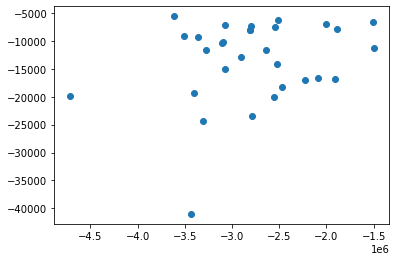

In [167]:
plt.scatter(logprob[:,valid_chains_mask][0,:],logprob_filtered.mean(axis=0))

In [124]:
logprob_filtered.shape

(100, 15)

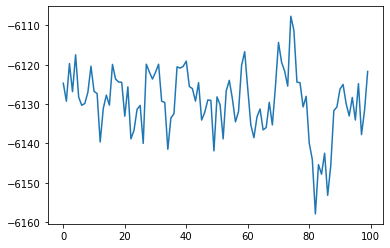

In [144]:
plt.plot(logprob_filtered[:,18])

In [168]:
logprob[:,:].max(axis=0)

DeviceArray([ -6119.6006,  -6117.501 , -10380.288 ,  -6105.3325,
              -6105.5366,  -6587.761 ,  -6374.5005,  -5574.332 ,
              -6125.0757,  -6122.4116, -10251.983 ,  -5559.7773,
              -7686.6196,  -7686.378 ,  -6165.4087, -10774.857 ,
              -5563.2144,  -6111.1606,  -6476.2974, -10053.295 ,
              -7127.985 ,  -6267.794 ,  -6205.2563,  -6505.4077,
              -5593.9937,  -7587.9404,  -9688.972 ,  -8971.004 ,
              -6376.3945,  -6131.6587,  -6417.046 ,  -6115.7563],            dtype=float32)

In [107]:
np.argmin(logprob_filtered[:,1])

DeviceArray(92, dtype=int32)

In [105]:
logprob_filtered[:,12]

DeviceArray([-6290.675 , -6296.2915, -6284.721 , -6270.901 , -6281.5195,
             -6277.7217, -6281.054 , -6279.66  , -6284.6763, -6280.43  ,
             -6272.833 , -6265.7046, -6257.4043, -6260.096 , -6263.651 ,
             -6267.1226, -6256.813 , -6254.5444, -6246.5   , -6241.4727,
             -6240.572 , -6225.3667, -6236.368 , -6235.728 , -6226.972 ,
             -6240.0664, -6243.973 , -6239.5586, -6230.1113, -6229.3145,
             -6229.9976, -6226.675 , -6222.065 , -6224.8057, -6225.52  ,
             -6224.7515, -6228.005 , -6228.2783, -6227.5254, -6226.615 ,
             -6221.437 , -6224.5327, -6224.601 , -6218.7036, -6221.2856,
             -6215.108 , -6220.533 , -6214.496 , -6220.1265, -6213.052 ,
             -6224.9395, -6215.2705, -6230.4883, -6220.561 , -6221.436 ,
             -6197.9614, -6203.3794, -6198.9995, -6215.062 , -6206.049 ,
             -6204.917 , -6206.453 , -6192.0063, -6198.9214, -6195.2646,
             -6180.406 , -6189.7305, -6197.0747, -6

[]

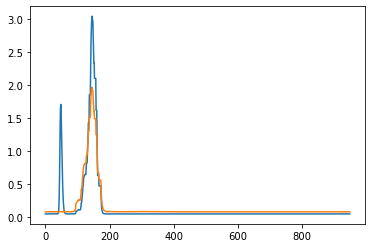

In [89]:
plt.plot(target_rate[:trial_len])
# plt.plot(target_spk[:trial_len])
ss=-4
cc=2
plt.plot(yhat_pred_intime[ss,cc,:trial_len])
plt.plot()

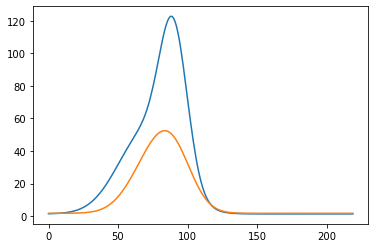

In [90]:
ind = (-1,16)
samples_one_draw = glmh.index_into_pytree(samples_filtered,ind)

tt=1
ys_l=gm.gm_func_by_trial(gm.get_regressor({'xs':np.arange(220)}),pars_sim)
plt.plot(np.squeeze(ys_l))
ys_l_hat=gm.gm_func_by_trial(gm.get_regressor({'xs':np.arange(220)}),samples_one_draw)
plt.plot(ys_l_hat[:,tt])



# df.query('trial_inds_int==3').groupby('position_bin').mean()['target_spk'].plot()

In [112]:
blackjax.diagnostics.effective_sample_size(samples_filtered['mus'],chain_axis=1,sample_axis=0)

DeviceArray([[7.6066504, 7.5913305],
             [7.608364 , 7.595445 ],
             [7.609205 , 7.593224 ],
             [7.607651 , 7.5915623],
             [7.6091986, 7.5899997],
             [7.6083484, 7.588889 ],
             [7.6087556, 7.5885825],
             [7.610396 , 7.5884185],
             [7.6105537, 7.5886707],
             [7.609494 , 7.5888486],
             [7.6098866, 7.589081 ],
             [7.608484 , 7.5902095],
             [7.605014 , 7.5897245],
             [7.6050587, 7.590907 ],
             [7.603406 , 7.5905466],
             [7.6020494, 7.590712 ],
             [7.6017113, 7.589694 ],
             [7.603323 , 7.5887914],
             [7.6034374, 7.588437 ],
             [7.603855 , 7.589397 ]], dtype=float32)

In [47]:
blackjax.diagnostics.effective_sample_size(samples['logws'],chain_axis=1,sample_axis=0)

DeviceArray([[12.863072 ,  8.921758 ],
             [10.143004 , 10.123074 ],
             [12.415119 , 11.20893  ],
             [11.848189 ,  9.892171 ],
             [10.403778 ,  9.607141 ],
             [12.713308 , 12.305938 ],
             [ 9.98852  , 11.507096 ],
             [10.249747 , 10.215058 ],
             [12.194946 , 10.231094 ],
             [13.831857 , 12.769783 ],
             [10.564713 , 12.134005 ],
             [12.536623 , 11.958713 ],
             [10.5672245, 11.649022 ],
             [ 9.9616165,  9.253031 ],
             [12.634477 , 10.246012 ],
             [13.370663 , 14.171514 ],
             [12.159244 ,  9.937939 ],
             [12.329145 ,  9.423708 ],
             [10.540007 , 10.2794285],
             [11.05495  , 10.660473 ]], dtype=float32)

In [56]:
samples_filtered['logb'][(0,0)].shape

(20,)